# Data Analysis on Flipkart

### Importing Modules

In [1]:
# pip install mlxtend
# pip install cufflinks
# pip install plotly
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors
%matplotlib inline
import seaborn as sns
import numpy as np
plt.style.use('seaborn-whitegrid')

### Acessing the Dataset

In [4]:
df = pd.read_csv('C:/Users/Subhadeep Chakrabort/Downloads/FLIP.csv')   #access the dataset
df.head(3) #printing the first 2 datas of data frame

,pid,product_name,product_category_tree,retail_price,discounted_price,is_FK_Advantage_product,product_rating,brand,product_specifications
0,ACBEGNTVH7QYGJZU,Babeezworld Dungaree Baby Boy's Combo,"[""Baby Care >> Infant Wear >> Baby Boys' Cloth...",999.0,499.0,False,No rating available,Babeezworld,"{""product_specification""=>[{""key""=>""Primary Pr..."
1,SHTEBY72FGKPYBRU,Discountgod Men's Checkered Casual Shirt,"[""Clothing >> Men's Clothing >> Shirts >> Casu...",750.0,590.0,False,No rating available,Slim,"{""product_specification""=>[{""key""=>""Pattern"", ..."
2,SHTEB5MNYHJJQGBJ,Silver Streak Men's Printed Casual Denim Shirt,"[""Clothing >> Men's Clothing >> Shirts >> Casu...",1299.0,599.0,False,No rating available,Slim,"{""product_specification""=>[{""key""=>""Pattern"", ..."


In [5]:
df["product_name"]= df["product_name"].str.replace("bra", "innerwear",case = False)

### Finding the Original Price

In [6]:
df['OriginalPrice']=df['retail_price']- df['discounted_price']

### Based on Product Names the different range of Retail Price plotting on Bar Plot

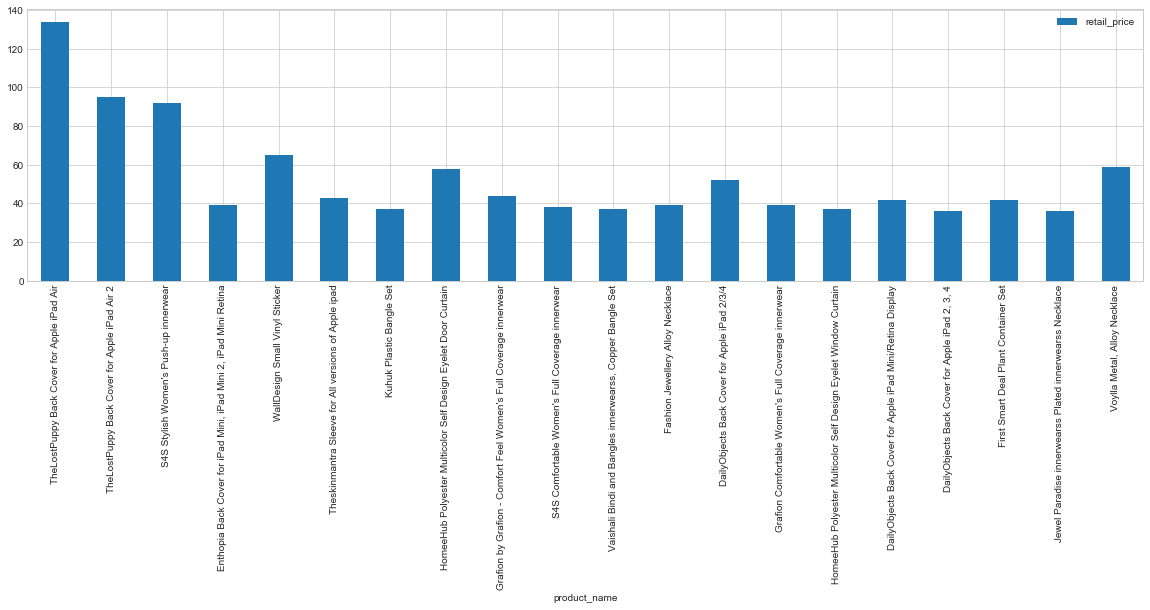

In [7]:
df[df['product_name'].isin(df['product_name'].value_counts()[0:20].index)][['OriginalPrice','product_name']].groupby('product_name').sum().reset_index().sort_values(by='OriginalPrice',ascending=False).merge(df[df['product_name'].isin(df['product_name'].value_counts()[0:20].index)]['product_name'].value_counts().to_frame().reset_index().rename(columns={'index':'product_name','product_name':'retail_price'}), on='product_name').plot.bar(x='product_name',y=['retail_price'],figsize=(20,5),stacked=True)

### The range of Retail Price plotting on histogram

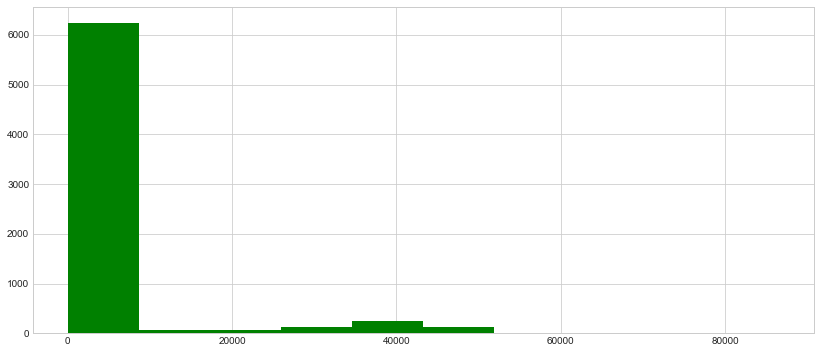

In [8]:
df['retail_price'].hist(color='green',bins=10,figsize=(14,6))

### Based on Product Names the different range of Discount Price plotting on Bar Plot

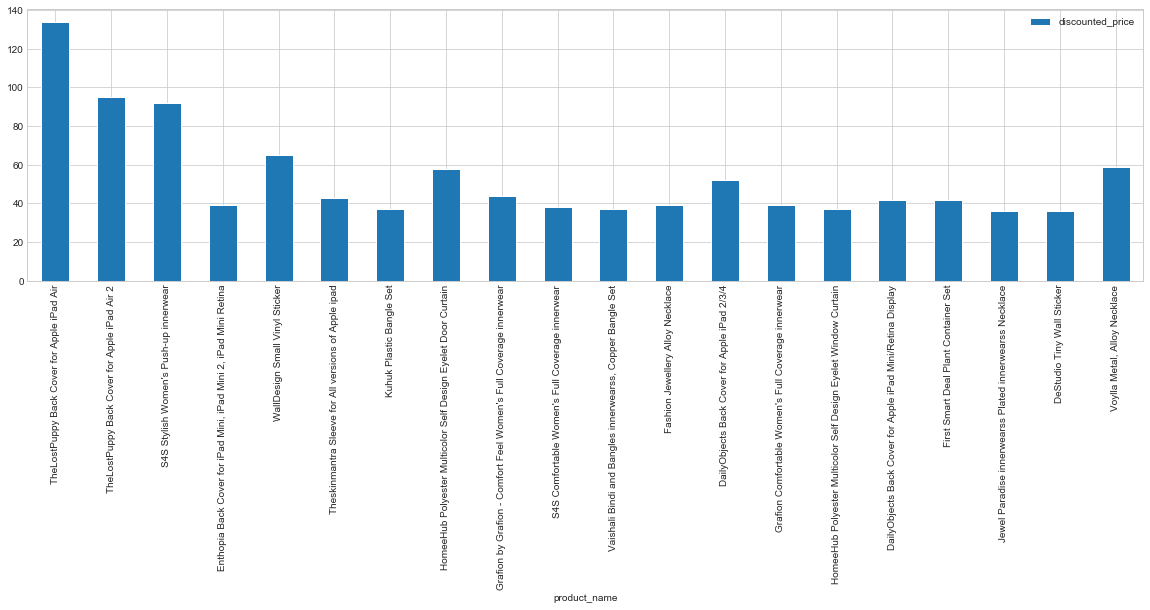

In [46]:
df[df['product_name'].isin(df['product_name'].value_counts()[0:20].index)][['OriginalPrice','product_name']].groupby('product_name').sum().reset_index().sort_values(by='OriginalPrice',ascending=False).merge(df[df['product_name'].isin(df['product_name'].value_counts()[0:20].index)]['product_name'].value_counts().to_frame().reset_index().rename(columns={'index':'product_name','product_name':'discounted_price'}), on='product_name').plot.bar(x='product_name',y=['discounted_price'],figsize=(20,5),stacked=True)

### The range of Discount Price plotting on Histogram

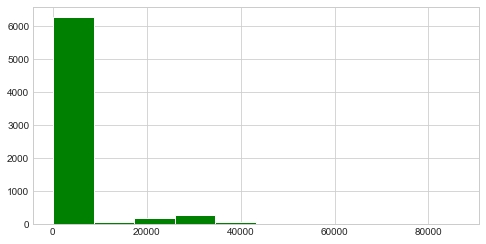

In [47]:
df['discounted_price'].hist(color='green',bins=10,figsize=(8,4))

### Based on Product Names the range of Original Price plotting on Bar Plot

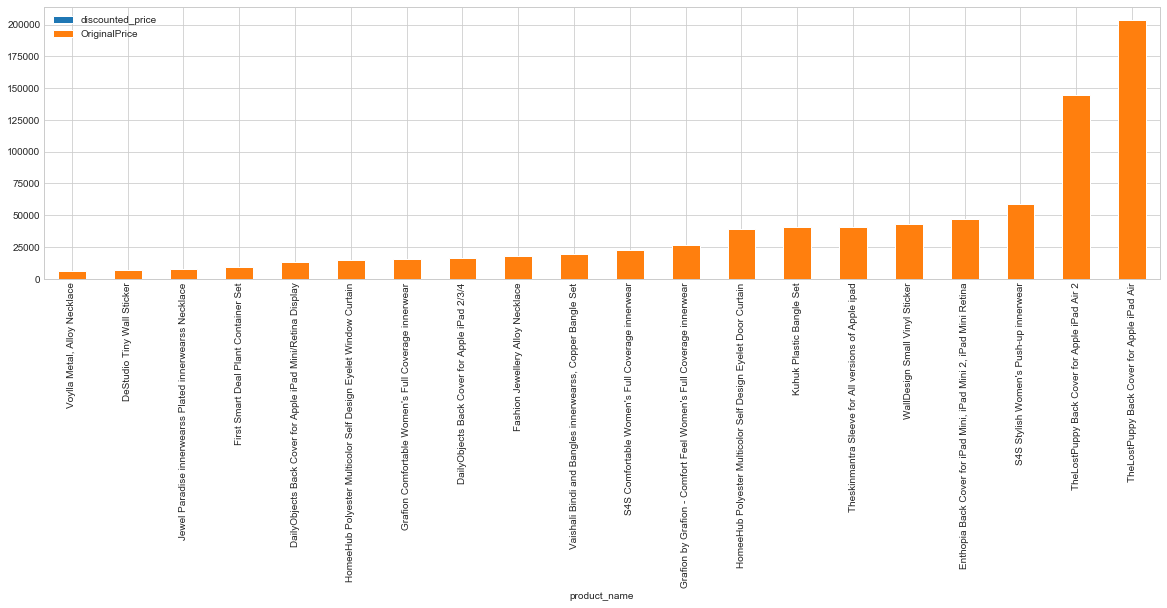

In [48]:
df[df['product_name'].isin(df['product_name'].value_counts()[0:20].index)][['OriginalPrice','product_name']].groupby('product_name').sum().reset_index().sort_values(by='OriginalPrice',ascending=True).merge(df[df['product_name'].isin(df['product_name'].value_counts()[0:20].index)]['product_name'].value_counts().to_frame().reset_index().rename(columns={'index':'product_name','product_name':'discounted_price'}), on='product_name').plot.bar(x='product_name',y=['discounted_price','OriginalPrice'],figsize=(20,5),stacked=True)

### Based on Product Names the different product ratings

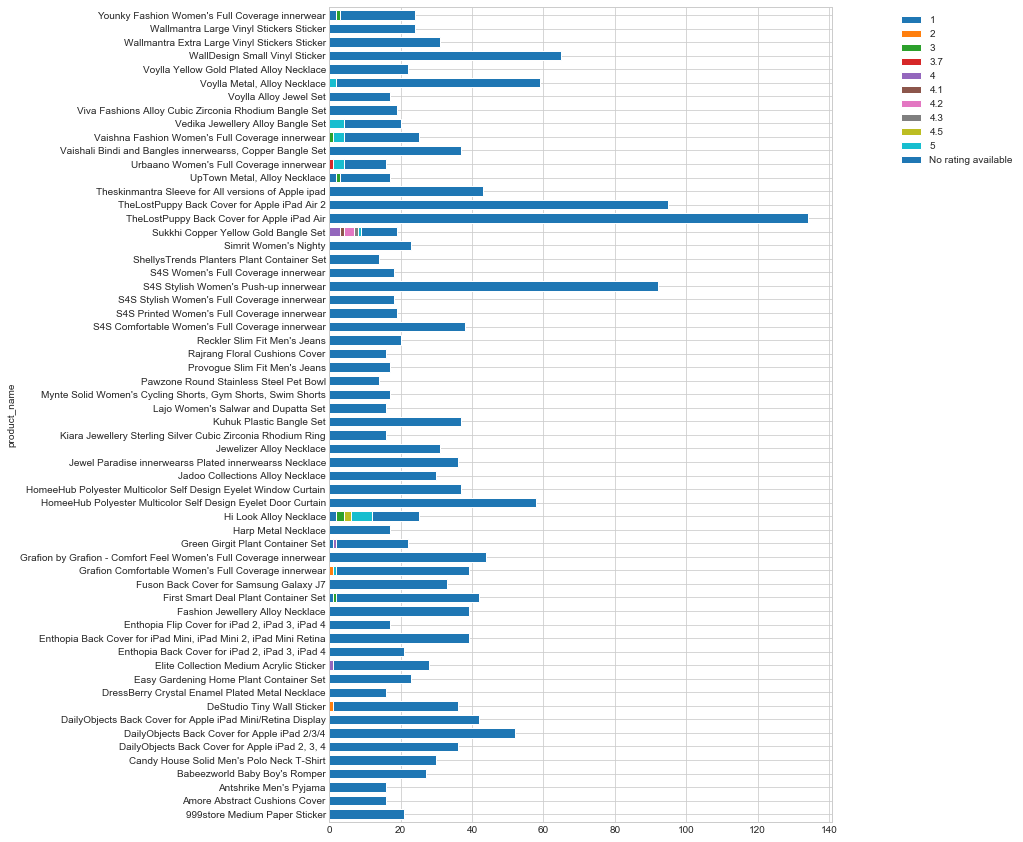

In [49]:
v1=df[df['product_name'].isin(df['product_name'].value_counts()[0:60].index)]
v2=v1[v1['product_rating'].isin(v1['product_rating'].value_counts()[0:60].index)]
pd.crosstab(v2['product_name'],v2['product_rating']).plot.barh(stacked=True,figsize=(9,15),width=0.7)
plt.legend(loc=9,bbox_to_anchor=(1.25,1))

### Based on Product Names the brands for the products

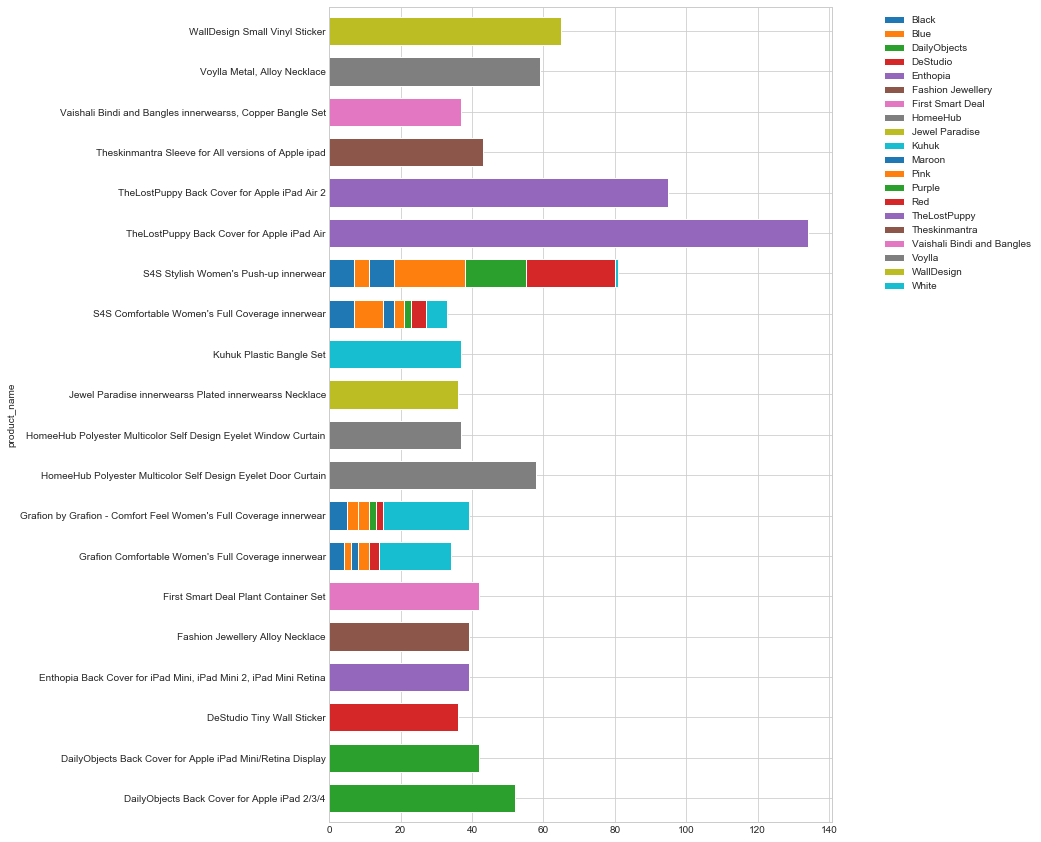

In [50]:
v1=df[df['product_name'].isin(df['product_name'].value_counts()[0:20].index)]
v2=v1[v1['brand'].isin(v1['brand'].value_counts()[0:20].index)]
pd.crosstab(v2['product_name'],v2['brand']).plot.barh(stacked=True,figsize=(9,15),width=0.7)
plt.legend(loc=9,bbox_to_anchor=(1.25,1))

### Based on Product Category Tree the different product ratings

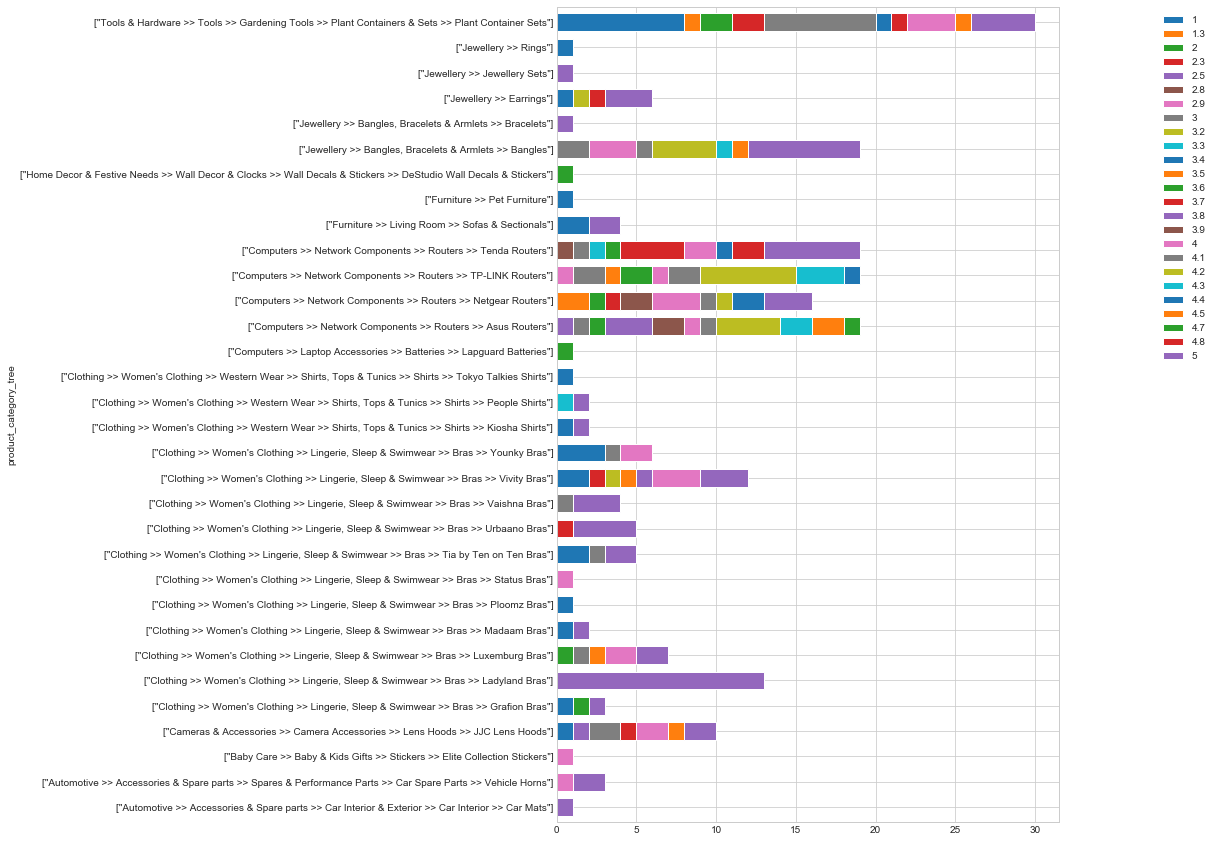

In [60]:
v1=df[df['product_category_tree'].isin(df['product_category_tree'].value_counts()[1:60].index)]
v2=v1[v1['product_rating'].isin(v1['product_rating'].value_counts()[1:60].index)]
pd.crosstab(v2['product_category_tree'],v2['product_rating']).plot.barh(stacked=True,figsize=(9,15),width=0.7)
plt.legend(loc=9,bbox_to_anchor=(1.25,1))

In [75]:
data = df[df['product_category_tree'].str.contains('Computers')]
data.head(3)

,pid,product_name,product_category_tree,retail_price,discounted_price,is_FK_Advantage_product,product_rating,brand,product_specifications,OriginalPrice
147,RTREGG8F83DMYHPE,D-Link DAP1320,"[""Computers >> Network Components >> Routers >...",3500.0,1978.0,False,No rating available,D-Link,"{""product_specification""=>[{""key""=>""Wireless S...",1522.0
2401,RTRE8GJUFNETVUMZ,Netgear R6220 AC1200 Dual Band Gigabit Wi-Fi R...,"[""Computers >> Network Components >> Routers >...",7000.0,4250.0,True,5,Netgear,"{""product_specification""=>[{""key""=>""Firewall"",...",2750.0
2405,RTRDNGVMCHXQT6HU,Tenda 3G150B,"[""Computers >> Network Components >> Routers >...",3000.0,1773.0,False,3,Tenda,"{""product_specification""=>[{""key""=>""In The Box...",1227.0


Text(0, 0.5, 'product_rating')

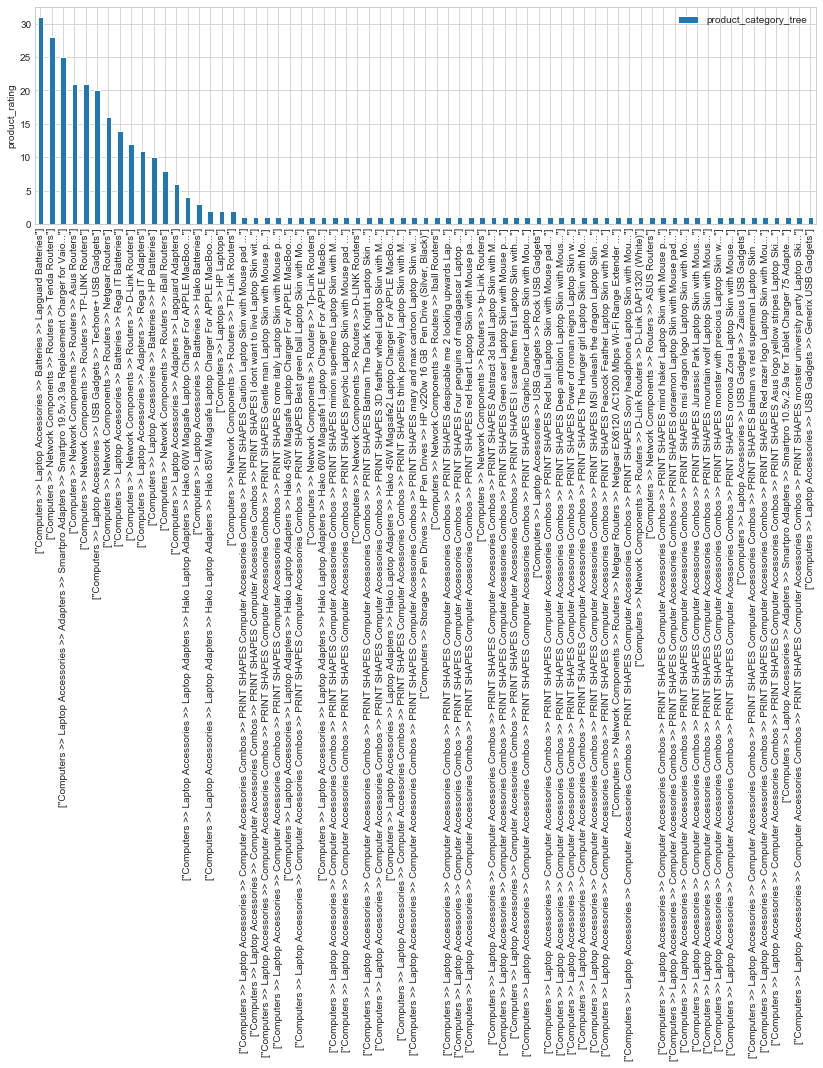

In [77]:
data[data["product_category_tree"].str.contains('Computers')]["product_category_tree"].value_counts()[0:500].to_frame().plot.bar(figsize=(14,4))
plt.ylabel('product_rating')

### Based on product category tree if it is a flipkart is advantageous product

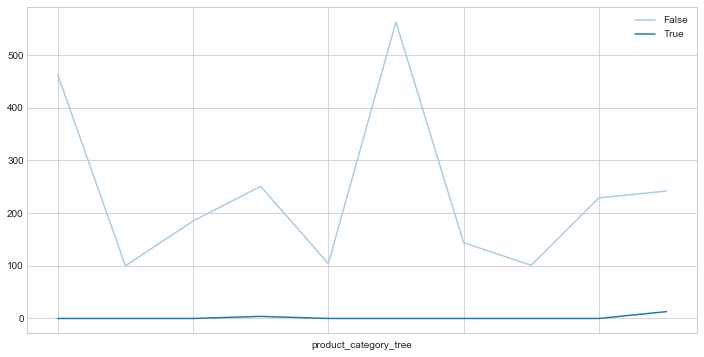

In [15]:
pd.crosstab(df[df['product_category_tree'].isin(df['product_category_tree'].value_counts()[1:11].index)]['product_category_tree'],\
            df[df['product_category_tree'].isin(df['product_category_tree'].value_counts()[1:11].index)]['is_FK_Advantage_product']\
           ).plot(color=sns.color_palette('Paired',10),figsize=(12,6))
plt.legend(loc=0)

### Based on product category tree the different brands present

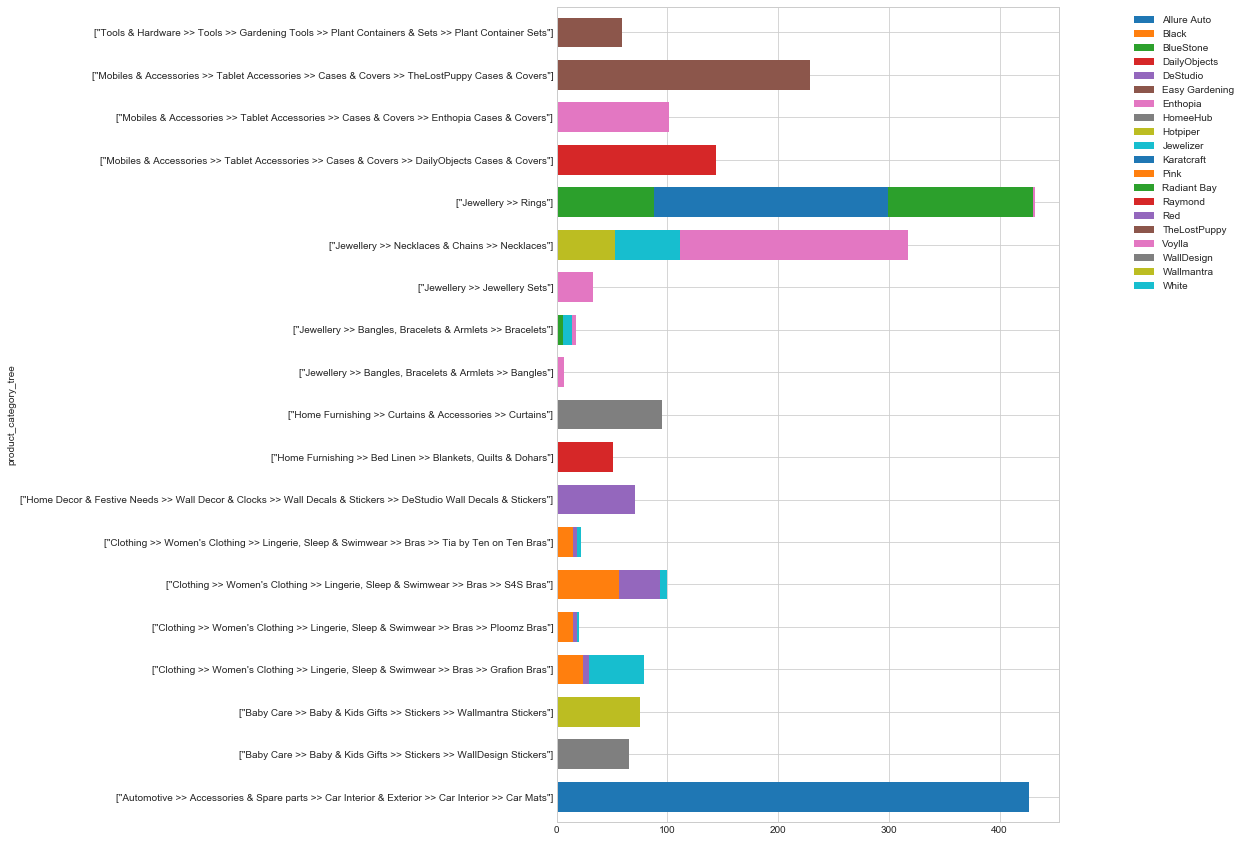

In [16]:
v1=df[df['product_category_tree'].isin(df['product_category_tree'].value_counts()[0:20].index)]
v2=v1[v1['brand'].isin(v1['brand'].value_counts()[0:20].index)]
pd.crosstab(v2['product_category_tree'],v2['brand']).plot.barh(stacked=True,figsize=(9,15),width=0.7)
plt.legend(loc=9,bbox_to_anchor=(1.25,1))

### Based on Brand the different product ratings

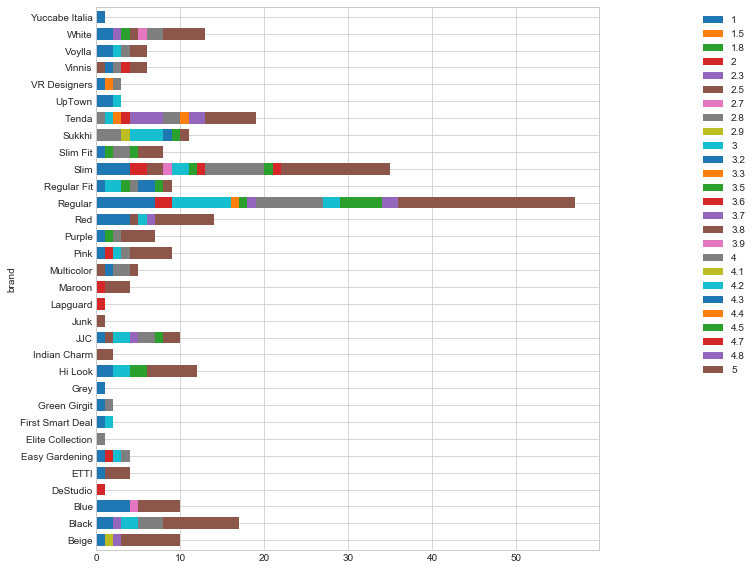

In [17]:
v1=df[df['brand'].isin(df['brand'].value_counts()[1:76].index)]
v2=v1[v1['product_rating'].isin(v1['product_rating'].value_counts()[1:76].index)]
pd.crosstab(v2['brand'],v2['product_rating']).plot.barh(stacked=True,figsize=(9,10),width=0.7)
plt.legend(loc=9,bbox_to_anchor=(1.25,1))

### Based on Brands if it is a flipkart's advantageous product

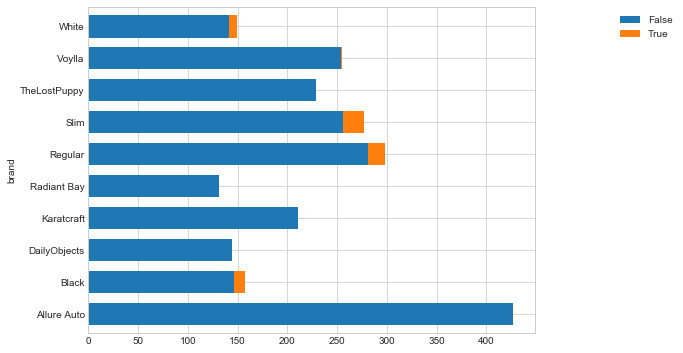

In [18]:
# brand hisabe is_FK_Advantage_product
v1=df[df['brand'].isin(df['brand'].value_counts()[0:10].index)]
v2=v1[v1['is_FK_Advantage_product'].isin(v1['is_FK_Advantage_product'].value_counts()[0:10].index)]
pd.crosstab(v2['brand'],v2['is_FK_Advantage_product']).plot.barh(stacked=True,figsize=(8,6),width=0.7)
plt.legend(loc=9,bbox_to_anchor=(1.25,1))

### Based on Brands if it is a flipkart's advantageous product using crosstab

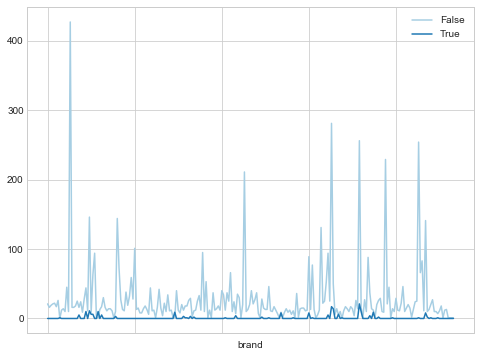

In [19]:
# brand hisabe if fk is advantageous product (crosstab)
pd.crosstab(df[df['brand'].isin(df['brand'].value_counts()[0:600].index)]['brand'],\
            df[df['brand'].isin(df['brand'].value_counts()[0:600].index)]['is_FK_Advantage_product']\
           ).plot(color=sns.color_palette('Paired',10),figsize=(8,6))
plt.legend(loc=0)

### Using countplot to count how many are FLIPKART ADVANTAGE PRODUCT ?

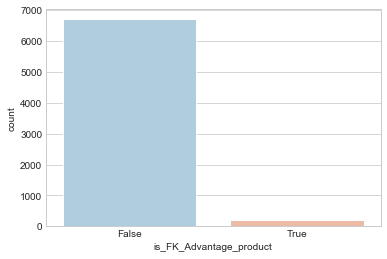

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='is_FK_Advantage_product',data=df,palette='RdBu_r')

### Based on Flipkart Advantage Product the different ratings

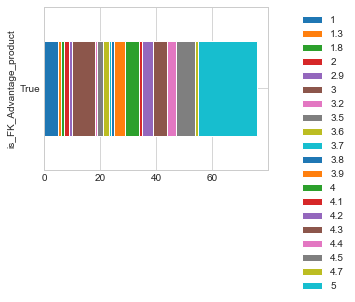

In [21]:
#  FK_Advantage_product BASED ON RATING
v1=df[df['is_FK_Advantage_product'].isin(df['is_FK_Advantage_product'].value_counts()[1:76].index)]
v2=v1[v1['product_rating'].isin(v1['product_rating'].value_counts()[1:76].index)]
pd.crosstab(v2['is_FK_Advantage_product'],v2['product_rating']).plot.barh(stacked=True,figsize=(4,3),width=0.7)
plt.legend(loc=9,bbox_to_anchor=(1.25,1))